In [32]:
import pandas as pd

In [33]:
from sklearn.datasets import fetch_california_housing

In [34]:
california = fetch_california_housing()

In [35]:
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [36]:
df = pd.DataFrame(california.data,columns = california.feature_names)

In [37]:
df['Price'] = california.target

In [38]:
print(df)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  Price  
0        -122

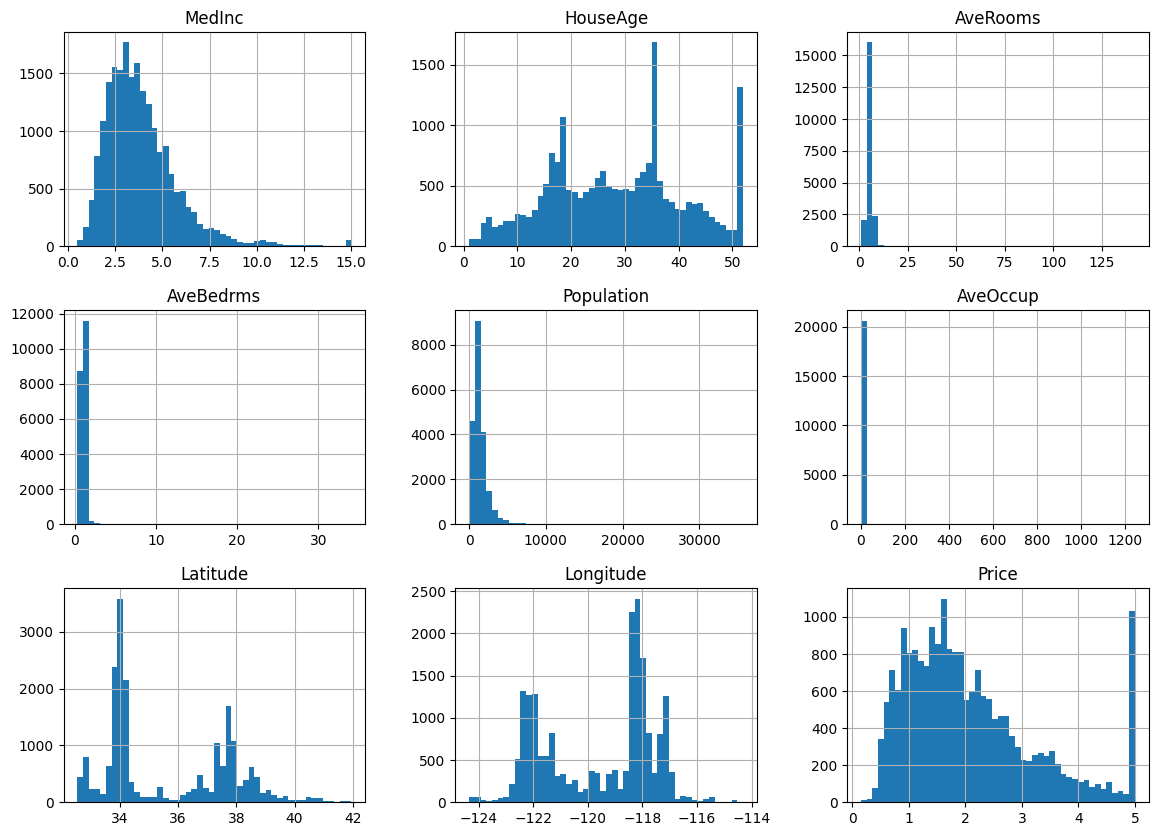

In [39]:
axes = df.hist(bins = 48,figsize = (14,10))

In [40]:
df = df[df['Price']<df['Price'].max()]

In [41]:
x = df.drop(['Price'],axis = 1)

In [42]:
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [43]:
y = df['Price']

In [44]:
from sklearn.model_selection import train_test_split

x_training,x_test,y_training,y_test = train_test_split(x,y,test_size =0.1,random_state = 42)

In [45]:
y_training = y_training.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler_x = StandardScaler()
x_training = scaler_x.fit_transform(x_training)
x_test = scaler_x.transform(x_test)

In [48]:
scaler_y= StandardScaler()
y_training = scaler_y.fit_transform(y_training)
y_test = scaler_y.transform(y_test)

In [49]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept = False)
model.fit(x_training,y_training)

LinearRegression(fit_intercept=False)

In [50]:
import matplotlib.pyplot as plt

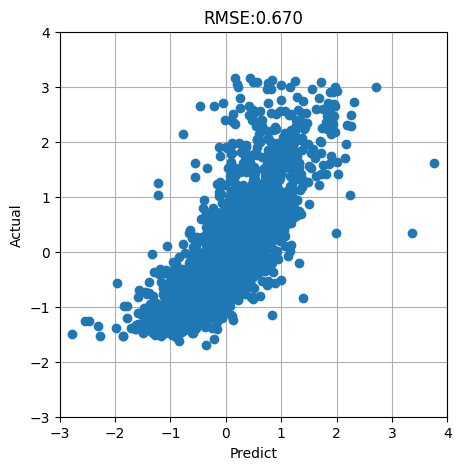

In [53]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test,model.predict(x_test),squared = False)

plt.figure(figsize = (5,5))
plt.xlim(-3,4)
plt.ylim(-3,4)
plt.plot(model.predict(x_test),y_test,'o')
plt.title('RMSE:{:.3f}'.format(rmse))
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.grid()
plt.show()